In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, precision_score, recall_score, log_loss
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [27]:
train = pd.read_csv('credit/train.csv', index_col='id')
print(train.shape)
train.head(4)

(2500, 6)


,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
id,,,,,,
1,1,1,1,1,1,Si
2,3,1,1,1,1,Si
3,2,1,1,1,1,Si
4,1,2,1,1,1,Si


In [20]:
test = pd.read_csv('credit/test.csv', index_col='id')
print(test.shape)
test.head(4)

(2419, 6)


,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,BuenPagador
id,,,,,,
1,1,1,1,1,1,Si
2,1,1,1,1,1,Si
3,3,1,1,1,1,Si
4,4,1,1,1,1,Si


In [4]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(train['BuenPagador']))}
class_mapping

{'No': 0, 'Si': 1}

In [5]:
train['BuenPagador'] = train['BuenPagador'].map(class_mapping)
test['BuenPagador']  = test['BuenPagador'].map(class_mapping)

In [376]:
print(type(train))
X_train = train.drop('BuenPagador', axis=1)
y_train = train['BuenPagador']
print(X_train.shape)
print(y_train.shape)
print(set(y_train))
print(y_train.value_counts())
print('Null accuracy = ',(y_train.value_counts()[1])/y_train.value_counts().sum())

<class 'pandas.core.frame.DataFrame'>
(2500, 5)
(2500,)
{0, 1}
1    2140
0     360
Name: BuenPagador, dtype: int64
Null accuracy =  0.856


In [377]:
print(type(test))
X_test = test.drop('BuenPagador', axis=1)
y_test = test['BuenPagador']
print(X_test.shape)
print(y_test.shape)
print(set(y_test))
print(y_test.value_counts())
print('Null accuracy = ',(y_test.value_counts()[1])/y_test.value_counts().sum())

<class 'pandas.core.frame.DataFrame'>
(2419, 5)
(2419,)
{0, 1}
1    2115
0     304
Name: BuenPagador, dtype: int64
Null accuracy =  0.8743282348077718


In [8]:
y_train_ohe=to_categorical(y_train)
y_test_ohe =to_categorical(y_test)

In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

In [238]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
print('Train Accuracy ',lr.score(X_train, y_train))
print('Test Accuracy  ',lr.score(X_test, y_test))
print('F1 score       ',f1_score(y_test, lr.predict(X_test_std)),'\n')
lr=LogisticRegression()
lr.fit(X_train_lda, y_train)
print('LDA Train Accuracy ',lr.score(X_train_lda, y_train))
print('LDA Test  Accuracy ',lr.score(X_test_lda, y_test))
print('LDA F1 score       ',f1_score(y_test, lr.predict(X_test_lda)),'\n')
lr=LogisticRegression()
lr.fit(X_train_rf, y_train)
print('rf Train Accuracy ',lr.score(X_train_rf, y_train))
print('rf Test  Accuracy ',lr.score(X_test_rf, y_test))
print('rf F1 score       ',f1_score(y_test, lr.predict(X_test_rf)))

Train Accuracy  0.8528
Test Accuracy   0.8739148408433237
F1 score        0.7653348339898705 

LDA Train Accuracy  0.852
LDA Test  Accuracy  0.8735014468788755
LDA F1 score        0.9320905459387483 

rf Train Accuracy  0.856
rf Test  Accuracy  0.8743282348077718
rf F1 score        0.932951036612263


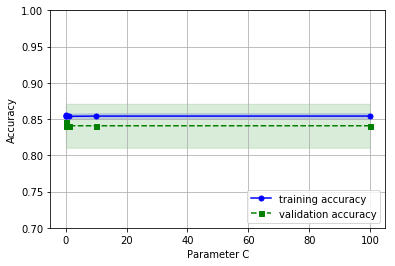

In [13]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=lr, X=X_train_std, y=y_train, param_name='C',
                                             param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std =  np.std(train_scores, axis=1)
test_mean =  np.mean(test_scores, axis=1)
test_std =   np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.show()

In [244]:
rf = RandomForestClassifier(random_state=None,n_estimators=500, oob_score=True)
rf.fit(X_train_std, y_train)
print('train accuracy: ',rf.score(X_train_std, y_train))
print('test accuracy:  ',rf.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, rf.predict(X_test_std)),'\n')
rf = RandomForestClassifier(random_state=None,n_estimators=500, oob_score=True)
rf.fit(X_train_lda, y_train)
print('LDA train accuracy: ',rf.score(X_train_lda, y_train))
print('LDA test accuracy:  ',rf.score(X_test_lda, y_test))
print('LDA F1 score        ', f1_score(y_test, rf.predict(X_test_lda)),'\n')
rf = RandomForestClassifier(random_state=None,n_estimators=500, oob_score=True)
rf.fit(X_train_pca, y_train)
print('PCA train accuracy: ',rf.score(X_train_pca, y_train))
print('PCA test accuracy:  ',rf.score(X_test_pca, y_test))
print('PCA F1 score        ', f1_score(y_test, rf.predict(X_test_pca)))

train accuracy:  0.9592
test accuracy:   0.9586606035551881
F1 score         0.9765147956787223 

LDA train accuracy:  0.9592
LDA test accuracy:   0.9508061182306738
LDA F1 score         0.9720197507641665 

PCA train accuracy:  0.9592
PCA test accuracy:   0.9520463001240181
PCA F1 score         0.972795497185741


In [231]:
X_train_rf=X_train[['GradoAcademico','CoefCreditoAvaluo']]
X_test_rf =X_test[['GradoAcademico','CoefCreditoAvaluo']]

In [230]:
rf = RandomForestClassifier(random_state=None,n_estimators=500, oob_score=True)
rf.fit(X_train_rf, y_train)
print('train accuracy: ',rf.score(X_train_rf, y_train))
print('test accuracy:  ',rf.score(X_test_rf, y_test))
print('F1 score        ', f1_score(y_test, rf.predict(X_test_rf)))

train accuracy:  0.9272
test accuracy:   0.9408846630839189
F1 score         0.9668904839083121


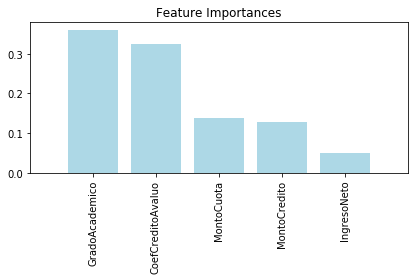

In [190]:
feat_labels = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

0.8812
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


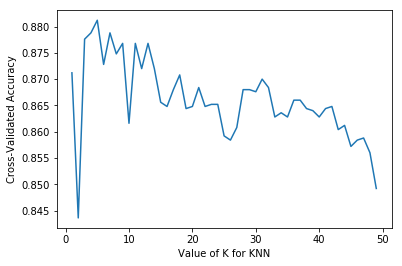

In [192]:
# create a parameter grid: map the parameter names to the values that should be searched
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
#print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs = -1)
grid.fit(X_train_std, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [81]:
print('train ',grid.score(X_train_std, y_train))
print('test  ',grid.score(X_test_std, y_test))
print('F1    ', f1_score(y_test, grid.predict(X_test_std)))

train  0.9484
test   0.9512195121951219
F1     0.9723523898781631


In [232]:
gbt=GradientBoostingClassifier(max_depth=3, n_estimators=50)
gbt.fit(X_train_std, y_train)
print('train accuracy: ',gbt.score(X_train_std, y_train))
print('test accuracy:  ',gbt.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, gbt.predict(X_test_std)),'\n')
gbt=GradientBoostingClassifier(max_depth=3, n_estimators=50)
gbt.fit(X_train_lda, y_train)
print('LDA train accuracy: ',gbt.score(X_train_lda, y_train))
print('LDA test accuracy:  ',gbt.score(X_test_lda, y_test))
print('LDA F1 score        ', f1_score(y_test, gbt.predict(X_test_lda)),'\n')
gbt=GradientBoostingClassifier(max_depth=3, n_estimators=50)
gbt.fit(X_train_rf, y_train)
print('rf train accuracy: ',gbt.score(X_train_rf, y_train))
print('rf test accuracy:  ',gbt.score(X_test_rf, y_test))
print('rf F1 score        ', f1_score(y_test, gbt.predict(X_test_rf)))

train accuracy:  0.9508
test accuracy:   0.961967755270773
F1 score         0.9784845650140318 

LDA train accuracy:  0.9292
LDA test accuracy:   0.9384042992972302
LDA F1 score         0.9657234874626179 

rf train accuracy:  0.9268
rf test accuracy:   0.9425382389417114
rf F1 score         0.9677569009510555


train accuracy:  0.9516
test accuracy:   0.9603141794129806
F1 score         0.9775491113189897


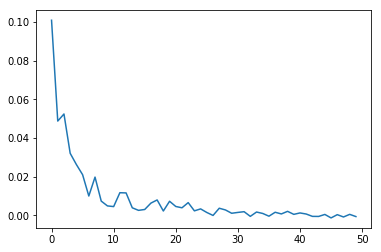

In [85]:
gbt=GradientBoostingClassifier(max_depth=3, n_estimators=50, subsample=0.8)
gbt.fit(X_train_std, y_train)
print('train accuracy: ',gbt.score(X_train_std, y_train))
print('test accuracy:  ',gbt.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, gbt.predict(X_test_std)))
fig,ax=plt.subplots()
ax.plot(gbt.oob_improvement_)

In [233]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train_std, y_train)
print('train accuracy: ',svm.score(X_train_std, y_train))
print('test accuracy:  ',svm.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, svm.predict(X_test_std)),'\n')
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_std, y_train)
print('train accuracy: ',svm.score(X_train_std, y_train))
print('test accuracy:  ',svm.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, svm.predict(X_test_std)),'\n')
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_rf, y_train)
print('rf train accuracy: ',svm.score(X_train_rf, y_train))
print('rf test accuracy:  ',svm.score(X_test_rf, y_test))
print('rf F1 score        ', f1_score(y_test, svm.predict(X_test_rf)))

train accuracy:  0.856
test accuracy:   0.8743282348077718
F1 score         0.932951036612263 

train accuracy:  0.9364
test accuracy:   0.9495659363373294
F1 score         0.9715750232991612 

rf train accuracy:  0.9272
rf test accuracy:   0.9417114510128152
rf F1 score         0.9673384294649062


In [234]:
boost = AdaBoostClassifier(n_estimators=40)
boost.fit(X_train_std, y_train)
print('train accuracy: ',boost.score(X_train_std, y_train))
print('test accuracy:  ',boost.score(X_test_std, y_test))
print('F1 score        ',   f1_score(y_test, boost.predict(X_test_std)),'\n')
boost = AdaBoostClassifier(n_estimators=40)
boost.fit(X_train_lda, y_train)
print('LDA train accuracy: ',boost.score(X_train_lda, y_train))
print('LDA test accuracy:  ',boost.score(X_test_lda, y_test))
print('LDA F1 score        ',   f1_score(y_test, boost.predict(X_test_lda)),'\n')
boost = AdaBoostClassifier(n_estimators=40)
boost.fit(X_train_rf, y_train)
print('rf train accuracy: ',boost.score(X_train_rf, y_train))
print('rf test accuracy:  ',boost.score(X_test_rf, y_test))
print('rf F1 score        ',   f1_score(y_test, boost.predict(X_test_rf)))

train accuracy:  0.9024
test accuracy:   0.9107069036792063
F1 score         0.9510204081632653 

LDA train accuracy:  0.892
LDA test accuracy:   0.9082265398925176
LDA F1 score         0.9496370235934665 

rf train accuracy:  0.86
rf test accuracy:   0.8797023563455973
rf F1 score         0.9356052223943351


In [50]:
model=Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.fit(X_train_std, y_train_ohe, validation_data=(X_test_std, y_test_ohe), epochs=5)

Train on 2500 samples, validate on 2419 samples
Epoch 1/5
2500/2500 [==============================] - 0s 74us/step - loss: 0.1401 - acc: 0.9536 - val_loss: 0.1399 - val_acc: 0.9591
Epoch 2/5
2500/2500 [==============================] - 0s 74us/step - loss: 0.1416 - acc: 0.9520 - val_loss: 0.1505 - val_acc: 0.9570
Epoch 3/5
2500/2500 [==============================] - 0s 66us/step - loss: 0.1400 - acc: 0.9508 - val_loss: 0.1350 - val_acc: 0.9616
Epoch 4/5
2500/2500 [==============================] - 0s 68us/step - loss: 0.1404 - acc: 0.9548 - val_loss: 0.1385 - val_acc: 0.9595
Epoch 5/5
2500/2500 [==============================] - 0s 79us/step - loss: 0.1378 - acc: 0.9536 - val_loss: 0.1382 - val_acc: 0.9628


2419/2419 [==============================] - 0s 36us/step
[0.13824892637896213, 0.9627945434214311]
F1 score         0.9789424426766495
Precision        0.9689671144048171
Recall           0.9891252955082742


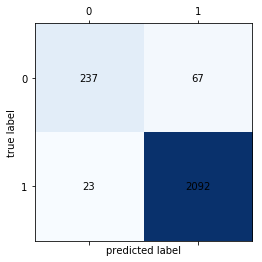

In [294]:
y_pred=model.predict_classes(X_test_std)
print(model.evaluate(X_test_std, y_test_ohe))
print('F1 score        ', f1_score(y_test, y_pred))
print('Precision       ', precision_score(y_test, y_pred))
print('Recall          ', recall_score(y_test, y_pred))
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=2)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [236]:
eclf1 = VotingClassifier(estimators=[('rf', rf), ('gbt', gbt), ('svm', svm)], voting='hard')
eclf1 = eclf1.fit(X_train_std, y_train)
print('train accuracy: ',eclf1.score(X_train_std, y_train))
print('test accuracy:  ',eclf1.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, eclf1.predict(X_test_std)),'\n')
eclf1 = VotingClassifier(estimators=[('rf', rf), ('gbt', gbt), ('svm', svm)], voting='hard')
eclf1 = eclf1.fit(X_train_lda, y_train)
print('LDA Train Accuracy ',eclf1.score(X_train_lda, y_train))
print('LDA Test  Accuracy ',eclf1.score(X_test_lda, y_test))
print('LDA F1 score       ',f1_score(y_test, eclf1.predict(X_test_lda)),'\n')
eclf1 = VotingClassifier(estimators=[('rf', rf), ('gbt', gbt), ('svm', svm)], voting='hard')
eclf1 = eclf1.fit(X_train_rf, y_train)
print('rf Train Accuracy ',eclf1.score(X_train_rf, y_train))
print('rf Test  Accuracy ',eclf1.score(X_test_rf, y_test))
print('rf F1 score       ',f1_score(y_test, eclf1.predict(X_test_rf)))

C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


train accuracy:  0.9548


C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


test accuracy:   0.9615543613063249


C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 score         0.9782354317809502 



C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LDA Train Accuracy  0.9308


C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LDA Test  Accuracy  0.9388176932616784


C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LDA F1 score        0.965961361545538 



C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


rf Train Accuracy  0.9272


C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Boris\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


rf Test  Accuracy  0.9417114510128152
rf F1 score        0.9673384294649062


In [140]:
ridge=RidgeClassifier()
ridge.fit(X_train_std, y_train)
print('train accuracy: ',ridge.score(X_train_std, y_train))
print('test accuracy:  ',ridge.score(X_test_std, y_test))
print('F1 score        ', f1_score(y_test, ridge.predict(X_test_std)))

train accuracy:  0.8564
test accuracy:   0.875155022736668
F1 score         0.9333627537511032


In [298]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
print('LDA train accuracy: ',lda.score(X_train_std, y_train))
print('LDA test accuracy:  ',lda.score(X_test_std, y_test))
print('LDA F1 score        ', f1_score(y_test, lda.predict(X_test_std)),'\n')
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_std, y_train)
print('QDA train accuracy: ',qda.score(X_train_std, y_train))
print('QDA test accuracy:  ',qda.score(X_test_std, y_test))
print('QDA F1 score        ', f1_score(y_test, qda.predict(X_test_std)))

LDA train accuracy:  0.8448
LDA test accuracy:   0.8656469615543613
LDA F1 score         0.9274067455885638 

QDA train accuracy:  0.8596
QDA test accuracy:   0.8685407193054981
QDA F1 score         0.9271310724106324


In [178]:
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda  = lda.transform(X_test_std)

In [243]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca =  pca.transform(X_test_std)

In [219]:
pca.explained_variance_ratio_

array([0.28160963, 0.24828369, 0.20466785, 0.14830646, 0.11713236])

In [371]:
predict=pd.read_csv('credit/nuevos_individuos_credito.csv', index_col='id')
X_predict = predict.drop('BuenPagador', axis=1)
y_pred=model.predict_classes(X_predict)
sub = X_predict.loc[:, []]
sub['Prediction']=y_pred
print(sub.shape)
class_mapping={0:'No', 1:'Si'}
sub['Prediction']=sub['Prediction'].map(class_mapping)
print(sub[:3])
sub.to_csv('credit/submission.csv')

(81, 1)
   Prediction
id           
1          Si
2          Si
3          Si
